<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Bond-prices-with-Vasicek-model-for-interest-rates" data-toc-modified-id="Bond-prices-with-Vasicek-model-for-interest-rates-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bond prices with Vasicek model for interest rates</a></span><ul class="toc-item"><li><span><a href="#Simulate-several-realizations-of-$r_t$" data-toc-modified-id="Simulate-several-realizations-of-$r_t$-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Simulate several realizations of $r_t$</a></span><ul class="toc-item"><li><span><a href="#Remarks" data-toc-modified-id="Remarks-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Remarks</a></span></li></ul></li><li><span><a href="#Plot-the-$T$-bond-price-$t-\to-p_t^T$" data-toc-modified-id="Plot-the-$T$-bond-price-$t-\to-p_t^T$-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plot the $T$-bond price $t \to p_t^T$</a></span><ul class="toc-item"><li><span><a href="#Remarks" data-toc-modified-id="Remarks-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Remarks</a></span></li></ul></li><li><span><a href="#Plot-the-yield-to-maturity-$T-\to-y_0^T$" data-toc-modified-id="Plot-the-yield-to-maturity-$T-\to-y_0^T$-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Plot the yield to maturity $T \to y_0^T$</a></span><ul class="toc-item"><li><span><a href="#Remarks" data-toc-modified-id="Remarks-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Remarks</a></span></li></ul></li></ul></li></ul></div>

# Bond prices with Vasicek model for interest rates

Consider the stochastic diﬀerential equation

$$dr_t = b(a − r_t) dt + \sigma dB_t \quad t \in [0, T]$$

where $b > 0$, $\sigma > 0$ and $a ≥ 0$. This process tends to drift towards its long-term mean $a$ : such a process is called mean-reverting.

1. Simulate several realizations of the process for diﬀerent values of $b, a, \sigma, T,$ and $N = 1000$. Do you observe the mean-reverting phenomena ?

2. For some of the realizations in (1) plot the $T$-bond price $t \to p_t^T$.

3. Plot some graphs of the yield to maturity $T \to y_0^T$ .

## Simulate several realizations of $r_t$

In [114]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [4]:
import seaborn as sns
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt  
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import norm
pd.options.display.max_rows = None

In [2]:
def sim_r(r0, a, b, mat, sig, steps, num_sim):
    N, T, I = steps, mat, num_sim  
    dt = T/N
    r = np.zeros((N+1 ,I)) 
    r[0] = r0 

    for j in range(1,N+1):  
        r[j] = r[j-1] + b*(a-r[j-1])*dt + sig*np.random.normal(scale=np.sqrt(dt), size=I)

    return(pd.DataFrame(r))

In [115]:
r1 = sim_r(0.1, 0.2, 0.1, 5, 0.05, 1000, 1)
r2 = sim_r(0.1, 0.2, 1, 5, 0.01, 1000, 1)
r3 = sim_r(0.1, 0.2, 5, 5, 0.05, 1000, 1)
r4 = sim_r(0.1, 0.2, 5, 5, 0.01, 1000, 1)
r = pd.concat([r1, r2, r3, r4],axis= 1, ignore_index = True )
r = r.rename(columns = lambda x:  "sim_"+str(x+1))
r.head()

,sim_1,sim_2,sim_3,sim_4
0,0.100000,0.100000,0.100000,0.100000
1,0.099612,0.100404,0.104330,0.102592
2,0.101721,0.101167,0.113230,0.104256
3,0.102484,0.101414,0.112355,0.105448
4,0.102779,0.101805,0.114524,0.109030


[Text(0, 0.5, 'r'), Text(0.5, 0, 'Steps'), Text(0.5, 1.0, 'Simulations')]

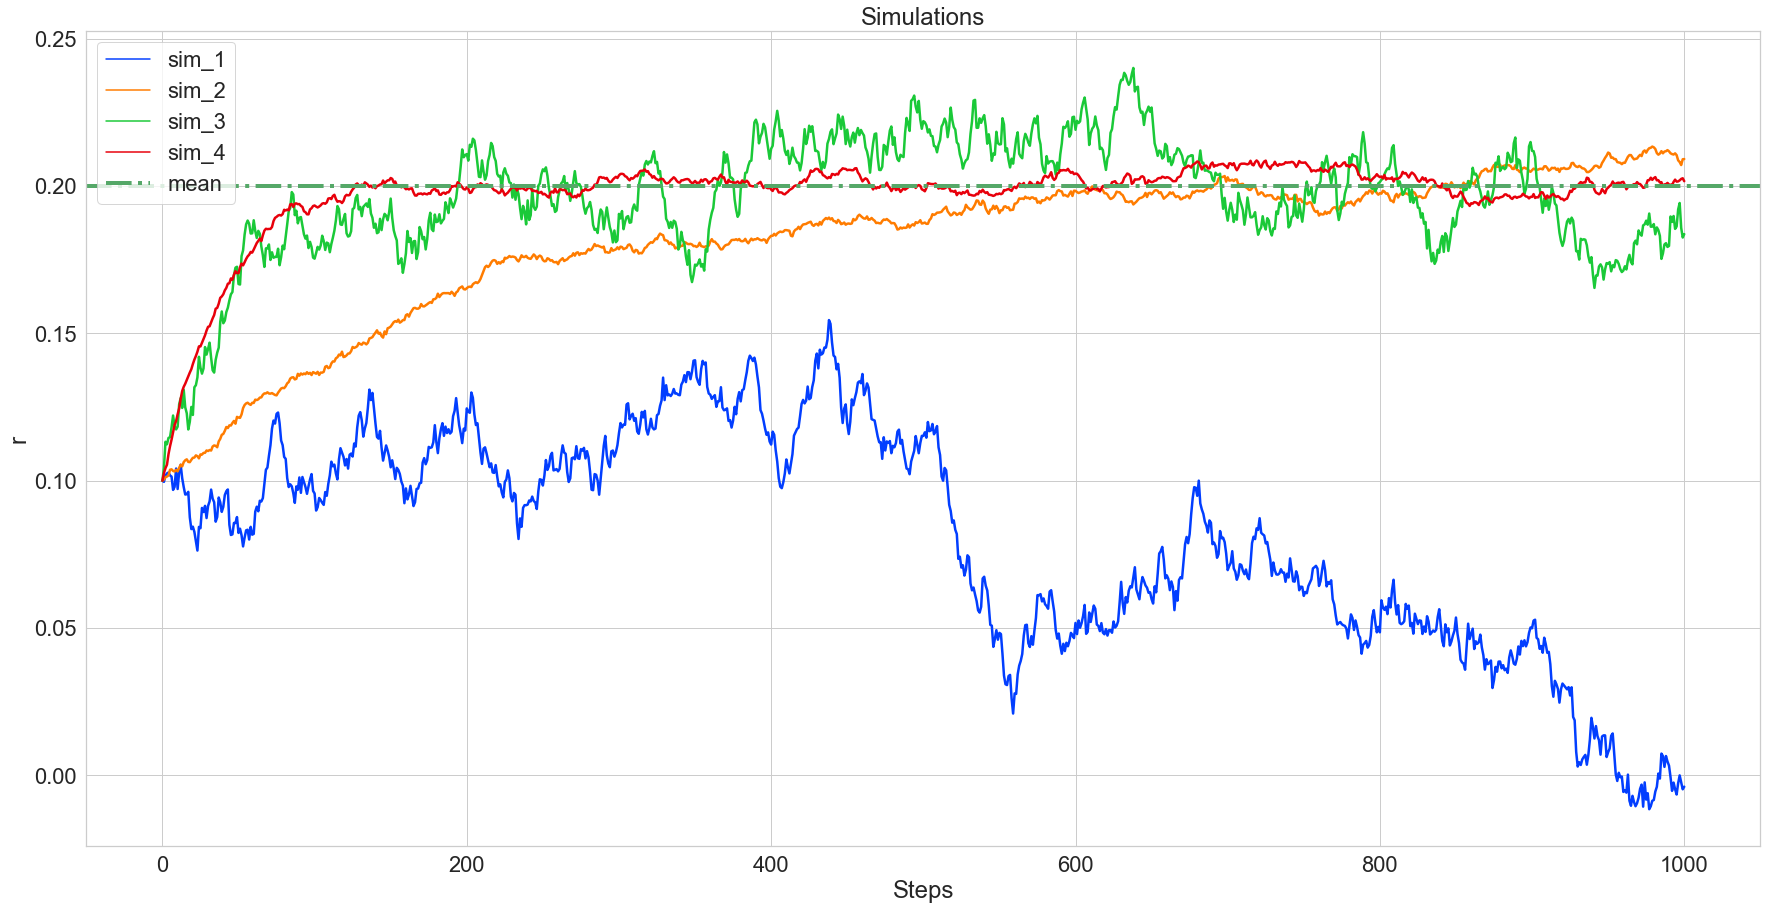

In [116]:
sns.set(style="whitegrid", font_scale=2)
plt.figure(figsize=(30,15))
ax = sns.lineplot(data=r, palette="bright", linewidth=2.5,dashes=False)
plt.axhline(y=0.2, color='g', linestyle='-.',lw = 4,label="mean")
plt.legend(loc='upper left')
ax.set(xlabel='Steps', ylabel='r', title="Simulations")

### Remarks
- Interest rates of simulation 2, 3 and 4 eventually revert to the long term mean $a = 0.2$.
- Interest rates of simulation 3 and 4 with mean reversion rate $b = 5.0$ converge faster than that of simulation 2 with mean reversion rate $b = 1.0$. 
- All other parameters equal,interest rates of simulation 3 with larger noise term $\sigma = 0.05$ is more volatile than that of simulation 4 with noise term $\sigma = 0.01$. 
- We do not observe clear mean-reverting phenomena from simulation 1, which could be explained by the small mean reversion rate $b = 0.1$.

## Plot the $T$-bond price $t \to p_t^T$
$$B_t^T = \frac{1}{b} (1-e^{-b(T-t)})$$
$$A_t^T = \frac{1}{b^2} (B_t^T-T+t)(b^2 a-\frac{1}{2} \sigma ^2)-\frac {\sigma ^2 (B_t^T)^2}{4b}$$
$$p_t^T = e^{A_t^T-r_t B_t^T}$$

In [38]:
def bond_price(r, a, b, mat, sig, steps):
    N, T= steps, mat
    dt = T/N
    p = []

    for j in range(0,N+1):  
        B_j = 1/b*(1-np.exp(-b*(T-j*dt)))
        A_j = (1/(b**2))*(B_j-T+j*dt)*(b**2*a-(1/2)*(sig**2))-(1/(4*b))*(sig**2)*(B_j)**2
        p_j = np.exp(A_j-r[j]*B_j )
        p.append(p_j)

    return(pd.DataFrame(p))

In [97]:
p1 = bond_price(r["sim_1"], 0.2, 0.1, 5, 0.05, 1000)
p2 = bond_price(r["sim_2"], 0.2, 1, 5, 0.01, 1000)
p3 = bond_price(r["sim_3"], 0.2, 5, 5, 0.05, 1000)
p4 = bond_price(r["sim_4"], 0.2, 5, 5, 0.01, 1000)

p = pd.concat([p1, p2, p3, p4],axis= 1, ignore_index = True )
p = p.rename(columns = lambda x:  "bond prices of sim "+str(x+1))
p.head()

,bond prices of sim 1,bond prices of sim 2,bond prices of sim 3,bond prices of sim 4
0,0.565453,0.406367,0.375399,0.375315
1,0.570173,0.406540,0.375387,0.375590
2,0.570254,0.406735,0.375637,0.375804
3,0.564875,0.407203,0.375880,0.376035
4,0.567043,0.407276,0.376428,0.376278


[Text(0, 0.5, 'Prices'),
 Text(0.5, 0, 'Steps'),
 Text(0.5, 1.0, "T-bonds' prices")]

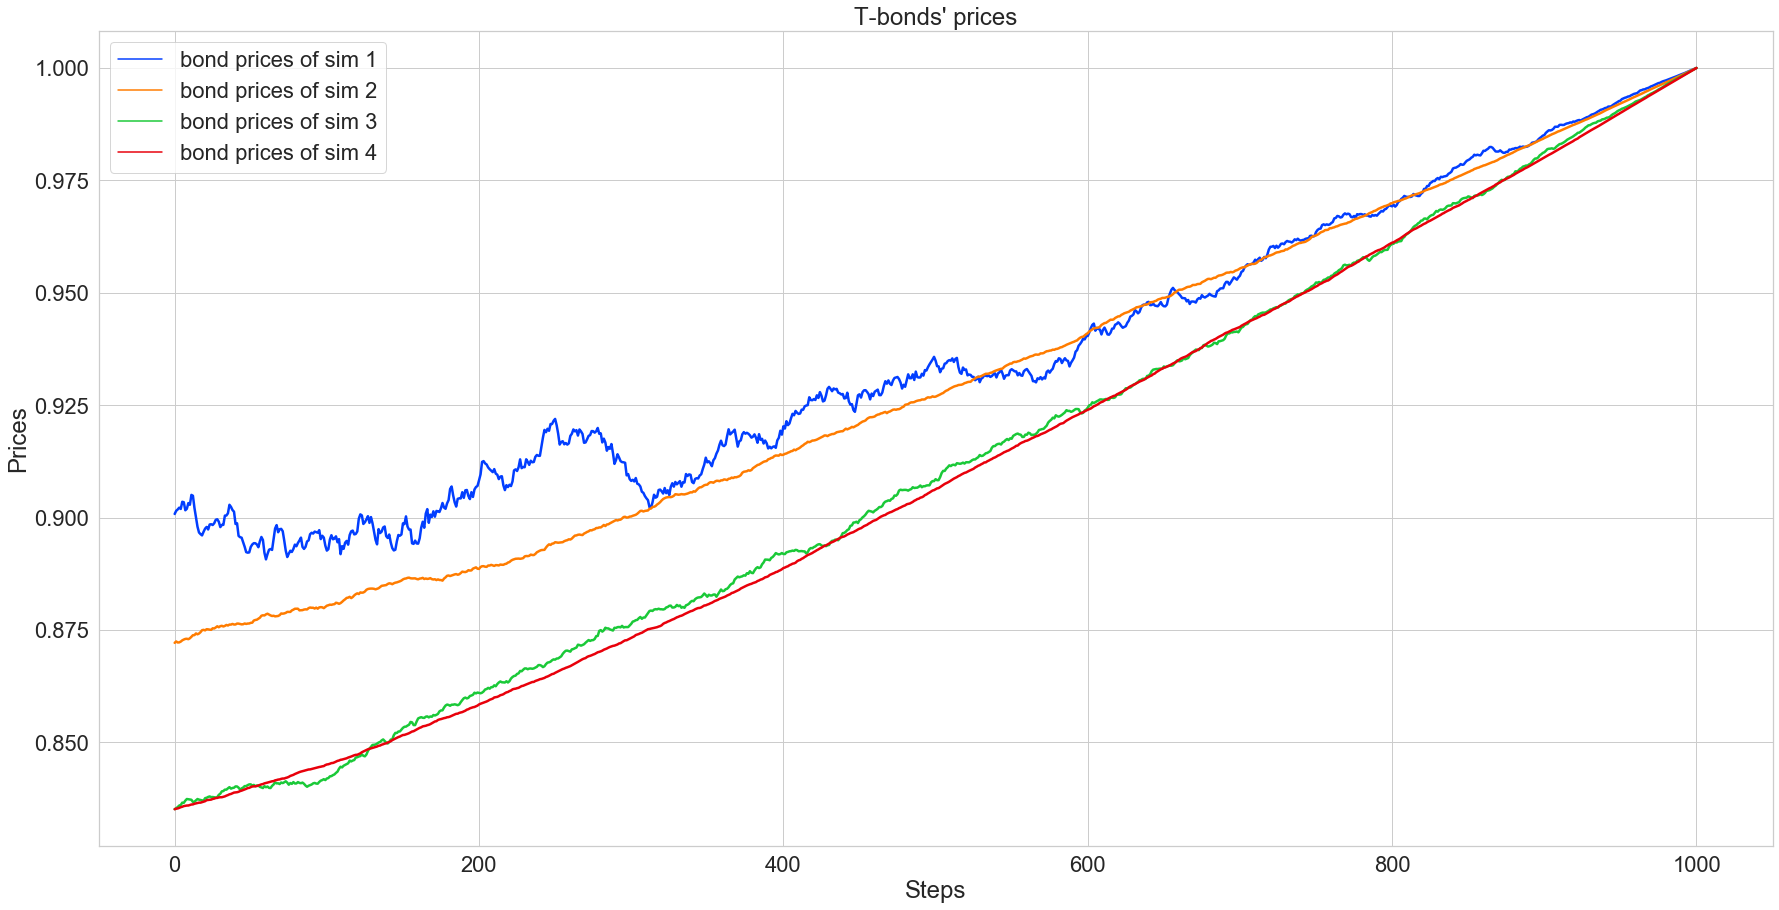

In [90]:
sns.set(style="whitegrid", font_scale=2)
plt.figure(figsize=(30,15))
ax = sns.lineplot(data=p, palette="bright", linewidth=2.5,dashes=False)
plt.legend(loc='upper left')
ax.set(xlabel='Steps', ylabel='Prices', title="T-bonds' prices")

### Remarks
- For $T$ ﬁxed, the map $t\  \to p_t^T$ is a stochastic process.
- T-bonds' prices converge to face value $p_T^T = 1$ as maturity approaches.
- All other parameters equal, bond price of simulation 3 with larger noise term $\sigma = 0.05$ is more volatile than that of simulation 4. Same phenomenon can also be observed in simulation 1 and 2.

## Plot the yield to maturity $T \to y_0^T$
$$y_t^T = -\frac{1}{T-t} log p_t^T$$
$$y_0^T = -\frac{1}{T} log p_0^T$$

In [75]:
def ytm(r0, a, b, max_mat, sig, steps):
    ytm = [r0]
#     p = []
    mats = list(np.arange(0, max_mat+0.1, 0.1))
    
    for T in mats:
        if T!=0:
            r = sim_r(r0, a, b, T, sig, steps, 1)
            p0 = bond_price(r[0], a, b, T, sig, steps)[0][0]
            ytm_T = (-1/T)*np.log(p0)
#             p.append(p0)
            ytm.append(ytm_T)         
    return(pd.DataFrame(ytm))

In [98]:
ytm1 = ytm(0.1, 0.2, 0.5, 20, 0.05, 1000)
ytm2 = ytm(0.1, 0.2, 1, 20, 0.01, 1000)
ytm3 = ytm(0.1, 0.2, 5, 20, 0.05, 1000)
ytm4 = ytm(0.2, 0.2, 5, 20, 0.01, 1000)
ytm5 = ytm(0.225, 0.2, 5, 20, 0.01, 1000)
ytms = pd.concat([ytm1, ytm2, ytm3, ytm4, ytm5],axis= 1, ignore_index = True )
ytms = ytms.rename(columns = lambda x: "ytm_"+str(x+1), index = lambda x: x/10)

In [99]:
ytms.tail()

,ytm_1,ytm_2,ytm_3,ytm_4,ytm_5
19.6,0.185562,0.194852,0.198930,0.199998,0.200253
19.7,0.185610,0.194878,0.198936,0.199998,0.200252
19.8,0.185657,0.194903,0.198941,0.199998,0.200251
19.9,0.185704,0.194929,0.198946,0.199998,0.200249
20.0,0.185750,0.194954,0.198951,0.199998,0.200248


[Text(0, 0.5, 'YTM'),
 Text(0.5, 0, 'Maturity (years)'),
 Text(0.5, 1.0, 'Yield Curve')]

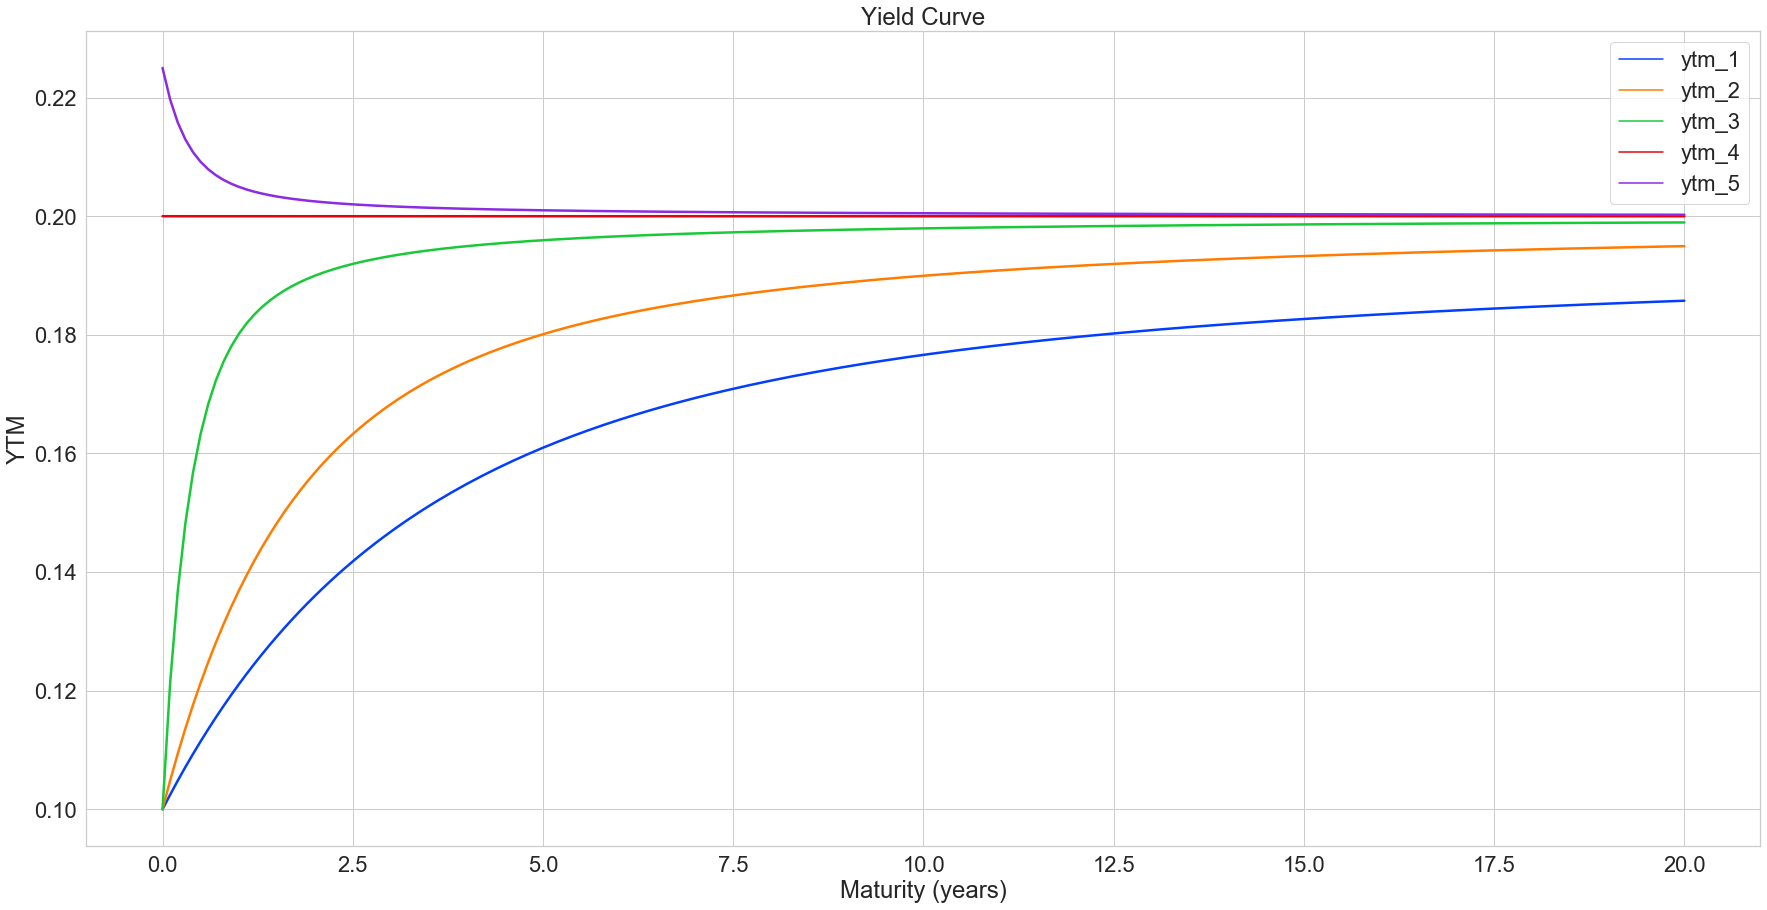

In [100]:
sns.set(style="whitegrid", font_scale=2)
plt.figure(figsize=(30,15))
ax = sns.lineplot(data=ytms, palette="bright", linewidth=2.5,dashes=False)
plt.legend(loc='upper right')
ax.set(xlabel='Maturity (years)', ylabel='YTM', title="Yield Curve")

### Remarks
- For $t$ ﬁxed, the map $T \to y_t^T$ is a smooth curve.
- If the long-run rate $a$ is higher than the current short rate (in our simulation is $r_0$), the yield curve is upward sloping, and vice versa. 